In [1]:
import geoplot as gplt 
import geoplot.crs as gcrs
import geopandas as gpd
gpd.__version__
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
from fiona.crs import from_epsg
import mapclassify as mc
import glob

#해안선 받아놓기

coastline= gpd.read_file('./Coastlinse_khoa/Coastlinse_khoa.shp', encoding='utf8')
#5179로변환  

coastline= coastline.to_crs(epsg=4326)

In [10]:
from geoband.API import *

ModuleNotFoundError: No module named 'geoband'

In [2]:
#맵 그리기 함수선언
def plot_map(data):
    ax = data.plot(figsize=(50, 30),facecolor='yellow', edgecolor='black',linewidth=0.5, zorder=2)
    coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=1,linewidth=0.5)
    plt.grid(True, alpha=0.5, linestyle='--')
    
def plot_colormap(data, column, interval, data2=None, data3=None, figsize = [50,30]):
    if data2 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=True)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    elif data3 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=True)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    else:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=True)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        data3.plot(ax = ax, facecolor='red', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')


In [3]:
flist = glob.glob('./Ex/220428/**/*.shp', recursive=True)
for fname in flist:
    print(fname.split('\\')[-1])
# flist

환경생태_0428.shp
환경생태계_용도구역지정.shp


In [9]:
data1 = gpd.read_file(flist[0], encoding='euckr')
data1 

,5_7_1,5_7_2,5_7_3,5_7_4,5_7_5,5_7_6,5_7_7,5_7_9,5_7_10,5_7_11,...,5_7_15,5_7_16,5_7_17,5_8_1,5_8_2,sqkm,ATT1,OBJECTID,UA_DT,geometry
0,None,국립공원_23_한려해상,None,None,None,None,None,None,None,None,...,전라남도 여수시_공원구,None,None,None,None,0.002,None,43297,"공원,환경기능구","POLYGON ((127.73798 34.55222, 127.73769 34.552..."
1,None,None,None,None,None,None,None,None,None,None,...,전라남도 여수시_공원구,None,None,None,None,0.027,None,28331,환경기능구,"POLYGON ((127.76679 34.51016, 127.76679 34.510..."
2,None,도시자연공원구역_59_전라남도 도시자연공원구역,None,None,None,None,None,환경보전해역_3_함평만,None,None,...,전라남도 무안군_공원구,None,None,None,None,0.314,None,232,"공원,환경보전해역,환경기능구","POLYGON ((127.71973 34.59263, 127.71967 34.592..."
3,None,국립공원_23_한려해상,None,None,None,None,None,None,None,None,...,전라남도 여수시_공원구,None,None,None,None,46.561,None,43297,"공원,환경기능구","POLYGON ((127.75460 34.57709, 127.75460 34.577..."
4,천연기념물_117_보성 비봉리 공룡알화석 산지(천연기념물 제418호),None,None,None,None,None,None,None,None,None,...,None,전라남도 보성군_해양문화자원보존구,None,None,None,0.001,None,355,"천연기념물,환경기능구","POLYGON ((128.13377 34.88678, 128.13363 34.886..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78197,천연보호구역_36_홍도 (천연기념물 제170호),국립공원_17_다도해해상,None,None,None,None,None,None,None,None,...,None,None,None,None,None,0.003,None,10601,"천연보호구역,공원","POLYGON ((125.20714 34.68891, 125.20714 34.688..."
78198,None,국립공원_23_한려해상,None,None,None,None,None,None,None,None,...,None,None,None,None,None,0.047,None,27756,공원,"POLYGON ((125.20947 34.69261, 125.20947 34.692..."
78199,천연보호구역_36_홍도 (천연기념물 제170호),국립공원_17_다도해해상,None,None,None,None,None,None,None,None,...,None,None,None,None,None,0.001,None,10601,"천연보호구역,공원","POLYGON ((125.21410 34.70524, 125.21412 34.705..."
78200,None,국립공원_23_한려해상,None,None,None,None,None,None,None,None,...,None,None,None,None,None,0.043,None,27756,공원,"MULTIPOLYGON (((125.21277 34.69995, 125.21277 ..."


In [8]:
data2 = gpd.read_file(flist[1], encoding='euckr')
data2 

,용도,layer,path,항명,flag,LONGITUDE,LATITUDE,지자체,항종,정밀주소,...,Y,어선수,메모,주요시설,지정일,tmp,고시문,좌표,비고,geometry
0,환경·생태계관리구역,용도구역_통합전국_환경생태계관리구역_220330_D,D:/00_2021_MSP/000.2022_해양공간계획(MSP)/통합작업/@통합작업...,향화도항,None,"126° 21' 37.5192"" E","35° 10' 6.7080"" N",영광군,어촌정주어항,전라남도 영광군 염산면 향화로 2-10,...,35.168530,113,None,방파제; 물양장; 선양장 등,2010년,126.360,None,None,None,"MULTIPOLYGON Z (((126.35971 35.16825 0.00000, ..."
1,환경·생태계관리구역,용도구역_통합전국_환경생태계관리구역_220330_D,D:/00_2021_MSP/000.2022_해양공간계획(MSP)/통합작업/@통합작업...,재원항,"지방어항,소규모어항 중복","126° 01' 45.1632"" E","35° 05' 9.9024"" N",신안군,지방어항,전라남도 신안군 임자면 재원리 107-54,...,35.086084,35,None,방파제;물양장,1973.03.07,126.029,None,None,None,"POLYGON Z ((126.03200 35.08618 0.00000, 126.03..."
2,환경·생태계관리구역,용도구역_통합전국_환경생태계관리구역_220330_D,D:/00_2021_MSP/000.2022_해양공간계획(MSP)/통합작업/@통합작업...,검산항,"지방어항,소규모어항 중복","126° 06' 18.6228"" E","34° 59' 52.4940"" N",신안군,지방어항,전라남도 신안군 증도면 방축리 산297-1,...,34.997915,41,None,방파제;물양장,1973.12.19,126.105,None,None,None,"MULTIPOLYGON Z (((126.10652 34.99441 0.00000, ..."
3,환경·생태계관리구역,용도구역_통합전국_환경생태계관리구역_220330_D,D:/00_2021_MSP/000.2022_해양공간계획(MSP)/통합작업/@통합작업...,추포항,None,"126° 04' 42.7548"" E","34° 47' 54.4632"" N",신안군,지방어항,전라남도 신안군 암태면 수곡리 산271,...,34.798462,27,None,방파제;물양장,2005.04.27,126.079,전라남도고시제2021-216호.pdf,5174,None,"MULTIPOLYGON Z (((126.07629 34.78718 0.00000, ..."
4,환경·생태계관리구역,용도구역_통합전국_환경생태계관리구역_220330_D,D:/00_2021_MSP/000.2022_해양공간계획(MSP)/통합작업/@통합작업...,원평항,None,"125° 54' 22.8600"" E","34° 46' 44.0148"" N",신안군,지방어항,전라남도 신안군 비금면 신원리 807-4,...,34.778893,48,None,방파제;물양장,2019.05.09,125.906,None,None,None,"MULTIPOLYGON Z (((125.91677 34.78002 0.00000, ..."
5,환경·생태계관리구역,용도구역_통합전국_환경생태계관리구역_220330_D,D:/00_2021_MSP/000.2022_해양공간계획(MSP)/통합작업/@통합작업...,수대항,None,"125° 56' 16.8648"" E","34° 43' 19.8264"" N",신안군,지방어항,전라남도 신안군 비금면 수대리 38-6,...,34.722174,49,None,물양장;선착장,1973.03.07,125.938,None,None,None,"MULTIPOLYGON Z (((125.93746 34.72054 0.00000, ..."
6,환경·생태계관리구역,용도구역_통합전국_환경생태계관리구역_220330_D,D:/00_2021_MSP/000.2022_해양공간계획(MSP)/통합작업/@통합작업...,화도항,None,"125° 56' 10.9140"" E","34° 42' 58.4100"" N",신안군,지방어항,전라남도 신안군 도초면 발매리 7-1,...,34.716225,23,None,물양장;선착장,1983.12.09,125.936,None,None,None,"MULTIPOLYGON Z (((125.93722 34.71586 0.00000, ..."
7,환경·생태계관리구역,용도구역_통합전국_환경생태계관리구역_220330_D,D:/00_2021_MSP/000.2022_해양공간계획(MSP)/통합작업/@통합작업...,소우이도항,"지방어항,소규모어항 중복(소우이도선착장)","125° 52' 14.1204"" E","34° 36' 39.6396"" N",신안군,지방어항,전라남도 신안군 도초면 우이도리 1500,...,34.611011,33,None,방파제;물양장,1973.03.07,125.871,None,None,None,"POLYGON Z ((125.87182 34.61075 0.00000, 125.87..."
8,환경·생태계관리구역,용도구역_통합전국_환경생태계관리구역_220330_D,D:/00_2021_MSP/000.2022_해양공간계획(MSP)/통합작업/@통합작업...,다수항,"지방어항,소규모어항 중보(다수선착장)","126° 09' 0.4068"" E","34° 37' 10.2684"" N",신안군,지방어항,전라남도 신안군 장산면 다수리 596-6,...,34.619519,31,None,방파제;물양장,1973.03.07,126.150,None,None,None,"MULTIPOLYGON Z (((126.15169 34.61986 0.00000, ..."
9,환경·생태계관리구역,용도구역_통합전국_환경생태계관리구역_220330_D,D:/00_2021_MSP/000.2022_해양공간계획(MSP)/통합작업/@통합작업...,국화항,None,"126° 53' 2.5008"" E","34° 12' 49.0104"" N",완도군,어촌정주어항,전라남도 완도군 청산면 국산리 929-8,...,34.213614,42,정밀주소(네이버조사),방파제; 물양장; 부잔교 등,2014. 12.,126.884,None,None,None,"POLYGON Z ((126.88324 34.21417 0.00000, 126.88..."


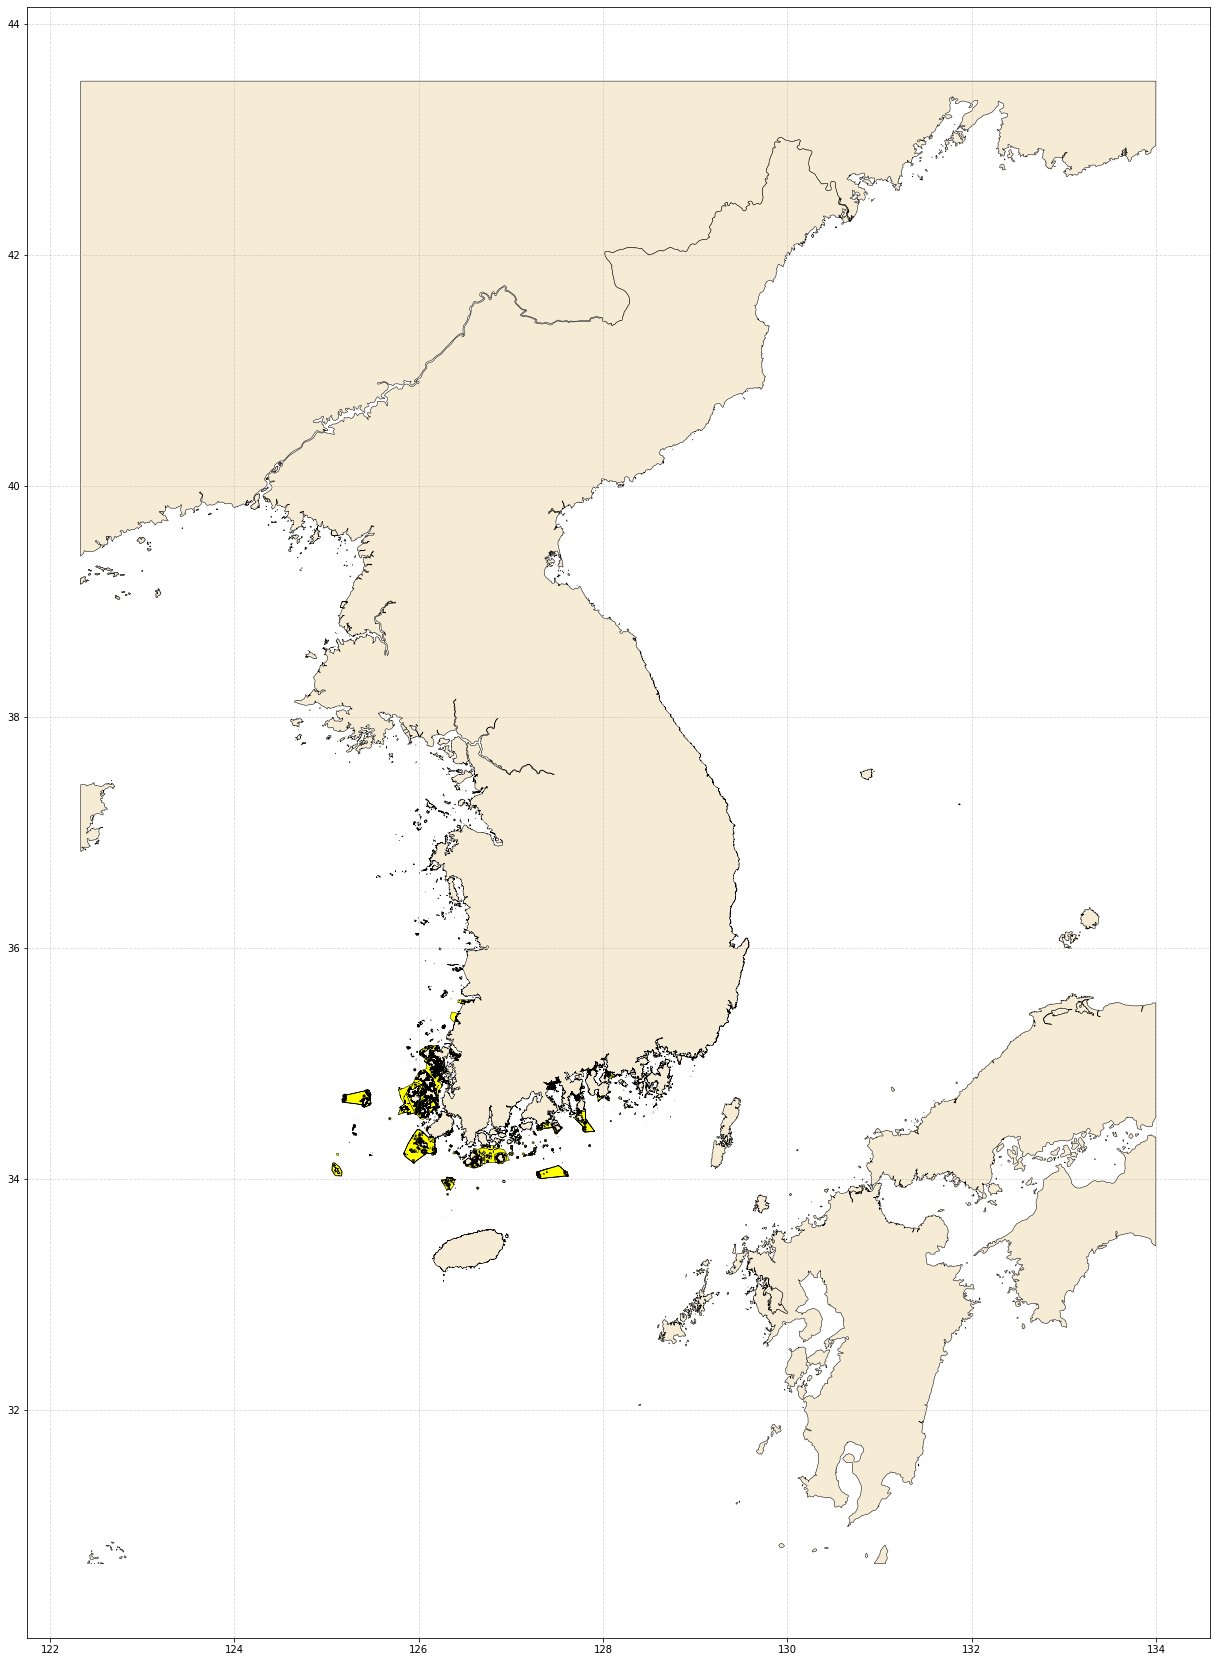

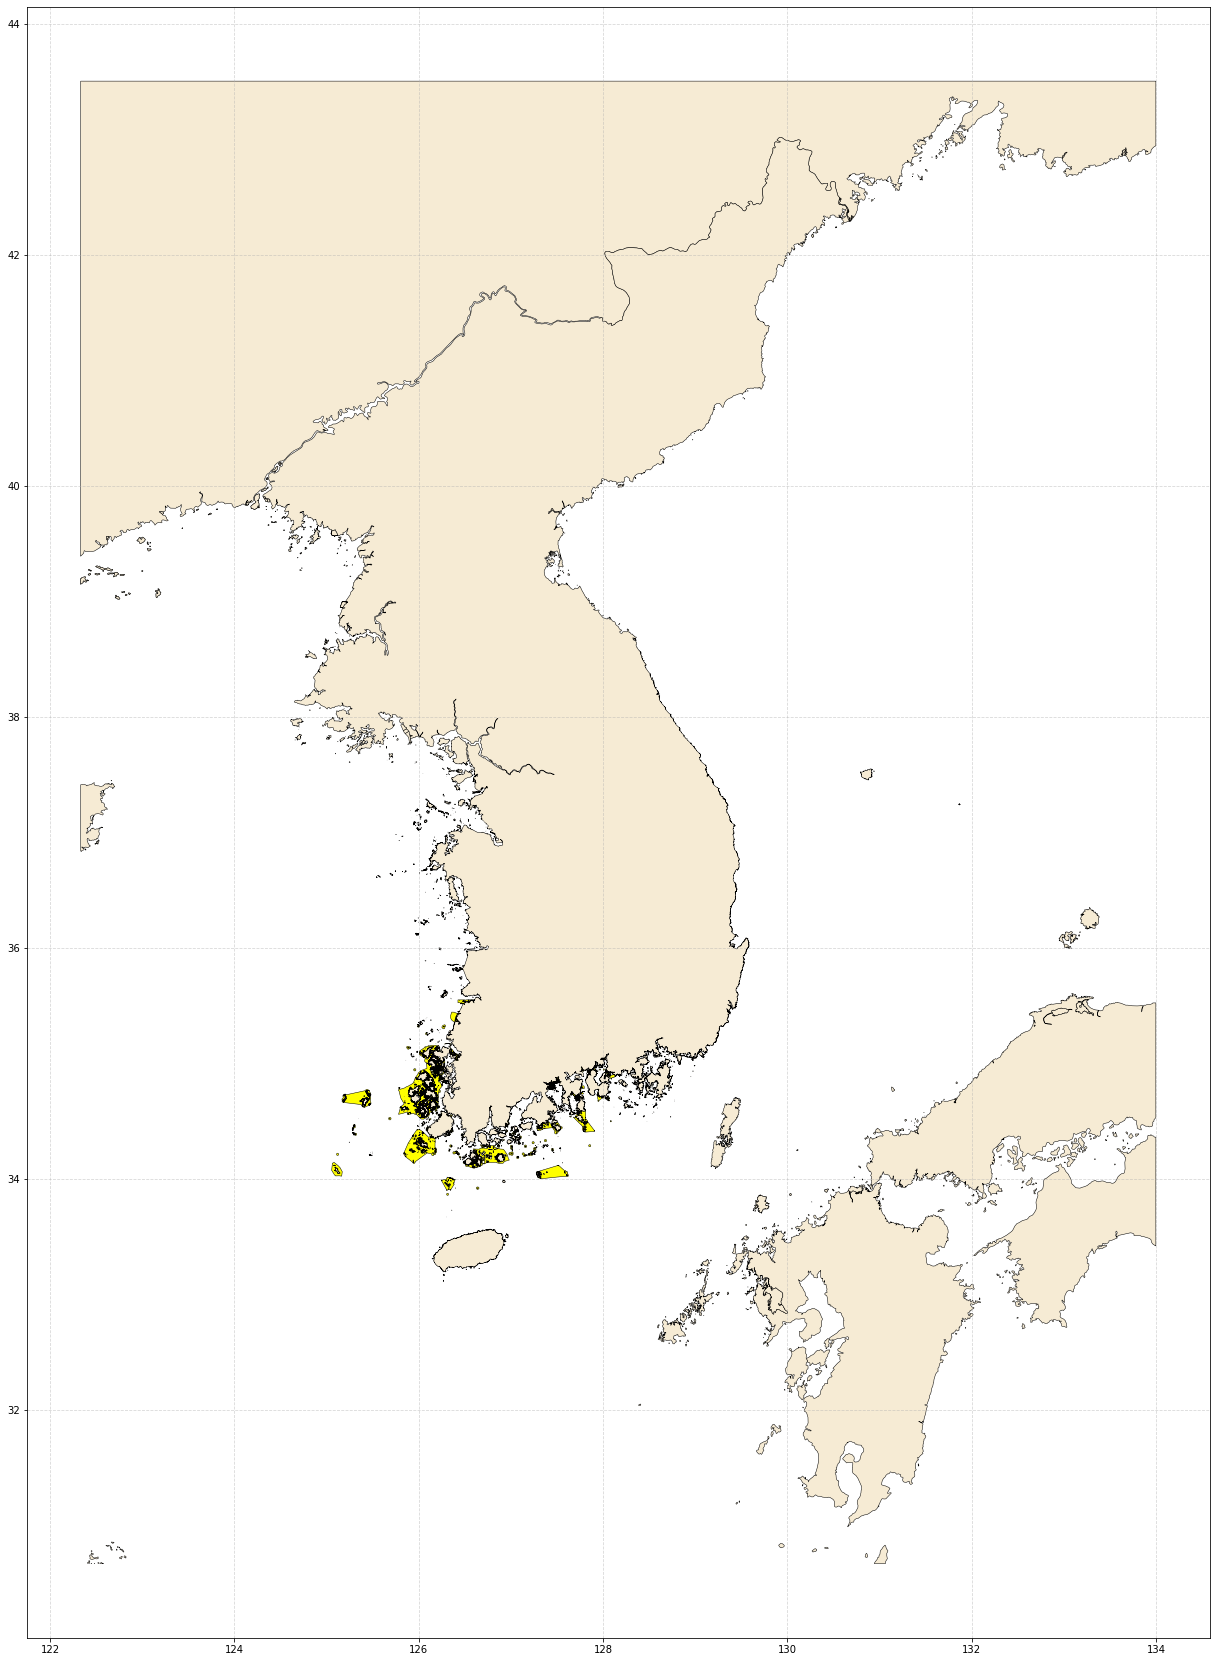

In [6]:
for fname in flist:
    try:
        data = gpd.read_file(fname, encoding='utf8') 
    except Exception as e:
        data = gpd.read_file(fname, encoding='euckr')
    plot_map(data)